

```
COPIES:
1. optimzers in "DA-2_Practise_21BAI1900".
2. Transfer Learning in "".
2. LeNet and AlexNet in "Model_CNN_21BAI1900".
3. RNN in "21BAI1900_Eval-5&6", "RNN_practise", "DL_RNN_Practise", "21BAI1900_TextClassification_RNN"
4. CNN
  a.) for simple csv classification "21BAI1900_DL-Eval_lab_02", "Custom_NN using Dataloaders"
  b.) for image using "same_file", "21BAI1900_DL_Eval-3",  
5.) Load inbuild datasets "Model_CNN_21BAI1900"
```



# CNN for IMAGE CLASSIFICATION

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as model, torchvision
import torchvision.transforms as transforms
from PIL import Image

In [ ]:
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    transforms.Grayscale(num_output_channels=1),
])

In [ ]:
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

100%|██████████| 170498071/170498071 [00:03<00:00, 51976725.71it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


Text(0.5, 1.0, 'tensor(0)')

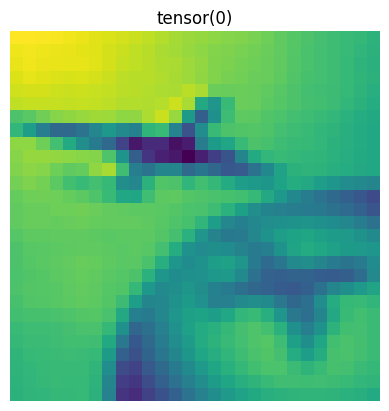

In [ ]:
import matplotlib.pyplot as plt

x,y = next(iter(train_loader))
plt.axis("off")
plt.imshow(x[0].permute(1, 2, 0))
plt.title(y[0])

In [ ]:
x[0].shape

torch.Size([1, 28, 28])

<H3>nn.Conv2d (in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)</H3>

In [ ]:
class MyNet(nn.Module):
    def __init__(self):
      super(MyNet, self).__init__()
      self.conv1 = nn.Conv2d(1,64,(3,3),padding="same")
      self.conv2 = nn.Conv2d(64,32,(3,3))
      self.fc1 = nn.Linear(6*6*32,15)
      self.fc2 = nn.Linear(15,10)

    def forward(self,x):
      x = F.relu(self.conv1(x))
      x = F.max_pool2d(x,(2,2))
      x = F.relu(self.conv2(x))
      x = F.max_pool2d(x,(2,2))
      x = x.view(-1,32*6*6)
      x = self.fc1(x)
      x = F.softmax(self.fc2(x),dim=1)  #dim = [-2,1]

      return x

model1 = MyNet()

In [ ]:
model1.train()

# plt.

model1(x[0])

tensor([[0.1189, 0.0868, 0.0859, 0.1147, 0.0940, 0.1135, 0.1189, 0.0861, 0.0909,
         0.0901]], grad_fn=<SoftmaxBackward0>)

In [ ]:
class GradientDescent:
    def __init__(self, parameters, lr=0.01):
        self.parameters = list(parameters)
        self.lr = lr

    def zero_grad(self):
        for param in self.parameters:
            if param.grad is not None:
                param.grad.detach_()
                param.grad.zero_()

    def step(self):
        for param in self.parameters:
            if param.grad is not None:
                param.data -= self.lr * param.grad

#--------------------------------------------------------------------------------------------------------


class CustomLoss(nn.Module):
    def __init__(self, weight=None, size_average=None, ignore_index=-100, reduce=None, reduction='mean'):
        super(CustomLoss, self).__init__()

    def forward(self, input, target):
        loss = torch.mean((input - target) ** 2)
        return loss


gd = GradientDescent(model1.parameters(),lr=0.001)
# gd = torch.optim.SGD(model1.parameters(), lr=0.001, momentum=0.9)

criterion = CustomLoss()
criterion = nn.CrossEntropyLoss()

```
Loss Functions:
1. L1 loss function (Mean Absolute Error Loss)
2. Mean Squared Error Loss
3. Cross-Entropy Loss
4. Binary Cross Entropy Loss
```

---

```
Gradient Function:
1. torch.optim.Adam(params, lr=0.001, betas=(0.9, 0.999)) #changes for every weights at each epoch.
2. torch.optim.SGD(params, lr=0.001, momentum=0.9)
```


In [ ]:
loss_list = []

num_epochs = 2
for epoch in range(num_epochs):
    running_loss = 0.0
    for j, data in enumerate(train_loader, 0):
        model1.train()
        inputs, labels = data

        gd.zero_grad()

        outputs = model1(inputs)
        # print(outputs)
        sec = []
        for i in outputs:
          sec.append(float(torch.argmax(i).item()))
        outputs1 = torch.tensor(sec, requires_grad=True)


        loss = criterion(outputs1.float(), labels.float())

        loss.backward()
        gd.step()

        running_loss += loss.item()
        if j % 100 == 99:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, j + 1, running_loss / 64))
            loss_list.append(running_loss/64)
            running_loss = 0.0

[1,   100] loss: 2862.057
[1,   200] loss: 2878.887
[1,   300] loss: 2823.075
[1,   400] loss: 2858.943
[1,   500] loss: 2863.603
[1,   600] loss: 2841.290
[1,   700] loss: 2879.459
[2,   100] loss: 2830.491
[2,   200] loss: 2862.993
[2,   300] loss: 2871.837
[2,   400] loss: 2846.496
[2,   500] loss: 2823.216
[2,   600] loss: 2875.749
[2,   700] loss: 2893.329


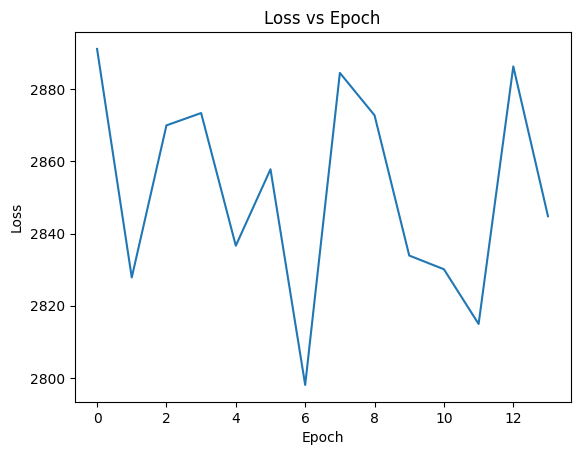

In [ ]:
plt.plot(np.arange(len(loss_list)), loss_list)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.show()


# CNN for REGRESSION